In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import aplpy as apl
from matplotlib.colors import LogNorm

In [3]:
vlt1 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT1.fits'
vlt2 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT2.fits'
vlt3 = '/Users/yaolun/bhr71/data/photometry/VLT/VLT3.fits'
# IRAC
irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'
irac2 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC2_mosaic.fits'
irac3 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC3_mosaic.fits'
irac4 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC4_mosaic.fits'
# SPIRE
datadir = '/Users/yaolun/test/'
spire250 = datadir+'extdPSW_jypx.fits'
spire350 = datadir+'extdPMW_jypx.fits'
spire500 = datadir+'extdPLW_jypx.fits'

### VLT data exploration

In [6]:
vlt = fits.open(vlt1)

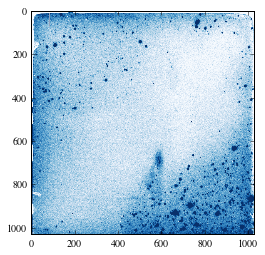

In [36]:
plt.imshow(vlt[0].data[::-1,:], norm=LogNorm(vmin=4000,vmax=4500), cmap=plt.cm.Blues)

### SPIRE data exploration

In [30]:
spire = fits.open(spire500)

/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:1018: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


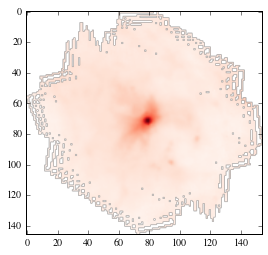

In [38]:
plt.imshow(spire[1].data[::-1,:], 
           norm=LogNorm(vmin=np.nanmin(spire[1].data),vmax=np.nanmax(spire[1].data)), cmap=plt.cm.Reds)

### Try to plot them together

In [42]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))

In [96]:
# shift and zoom-in functions for SPIRE
# design for SPIRE so that I can use the WCS
def scale(hdu_im, shift=(0,0), zoom=1.0, center=None):
    """
    center is the center ra/dec in astropy style
    shift = (y,x)
    """
    import scipy.ndimage.interpolation as interp
#     from astropy import wcs
    
#     w = wcs.WCS(hdu_im.header)
#     if center != None:
#         pix_center = w.wcs_world2pix(center.ra.degree, center.dec.degree, 1)
    
    nx_pix = len(hdu_im.data[:,0])/2
    ny_pix = len(hdu_im.data[0,:])/2
    
    # shift
    im = interp.shift(np.nan_to_num(hdu_im.data), shift)
    
    # zoom-in part
    im = interp.zoom(im, zoom)
    im = im[(len(im[:,0])/2-nx_pix):-nx_pix, (len(im[0,:])/2-ny_pix):-ny_pix]
    

    
    return im
im_scale = scale(spire[1], shift=(20,0), zoom=2)
print np.shape(im_scale)

(146, 154)


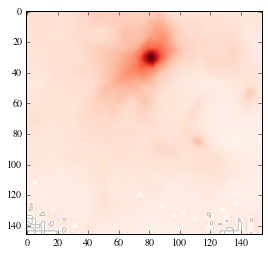

In [81]:
plt.imshow(im_scale[::-1,:], 
           norm=LogNorm(vmin=np.nanmin(spire[1].data),vmax=np.nanmax(spire[1].data)), cmap=plt.cm.Reds)

4.4591494248


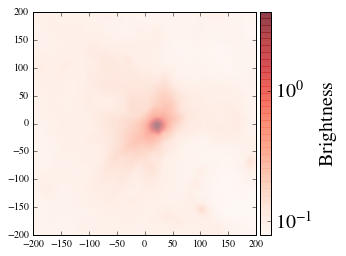

In [126]:
im = plt.imshow(scale(spire[1], shift=(20,25), zoom=5)[::-1,:], 
          norm=LogNorm(vmin=np.nanmin(spire[1].data),vmax=np.nanmax(spire[1].data)),
          cmap=plt.cm.Reds, extent=extent, alpha=0.5)
cb = plt.colorbar(im, pad=0.01)
cb.ax.set_ylabel(r'$\rm{Brightness}$',fontsize=20)
cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=20)
print np.nanmax(scale(spire[1], shift=(20,25), zoom=5)[::-1,:])

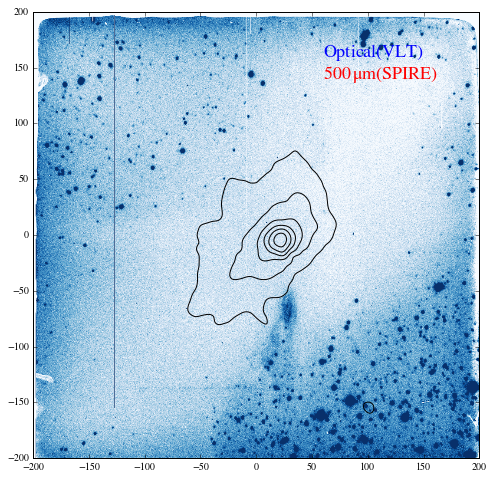

In [128]:
import matplotlib as mpl
mpl.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

extent = -200, 200, -200, 200

ax.imshow(vlt[0].data[::-1,:], norm=LogNorm(vmin=4000,vmax=4500), cmap=plt.cm.Blues, extent=extent)
levels = np.array([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0])
ax.contour(np.log10(scale(spire[1], shift=(20,25), zoom=5)), levels=levels,
            colors='k', linestyle='-', origin='lower', extent=extent)
# ax.imshow(scale(spire[1], shift=(20,25), zoom=5)[::-1,:], 
#           norm=LogNorm(vmin=np.nanmin(spire[1].data),vmax=np.nanmax(spire[1].data)),
#           cmap=plt.cm.Reds, extent=extent, alpha=0.5)

ax.text(0.65,0.9,r'$\rm{Optical(VLT)}$', fontsize=18,transform=ax.transAxes, color='b')
ax.text(0.65,0.85,r'$\rm{500\,\mu m(SPIRE)}$', fontsize=18,transform=ax.transAxes, color='r')

fig.savefig('/Users/yaolun/test/vlt_spire.pdf', format='pdf', dpi=300, bbox_inches='tight')